In [1]:
# For Gain Calibration at -109c/-110C, just use find and replace to change between \Downloads\Gain_-110C_0 to \Downloads\Gain_-110C

In [2]:
import numpy as np
from scipy import signal
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
# from natsort import natsorted
import pandas as pd
from scipy.signal import butter, lfilter, freqz, filtfilt
from scipy.special import erfc

import pandas as pd
import glob
import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [3]:
import sys
sys.path.insert(0,'../../../purity-monitor/')
sys.path.insert(0,'../../WaveformAnalysis')

In [4]:
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt
import Waveform as Waveform
import SiPM as SiPM

In [5]:
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)
importlib.reload(SiPM)

<module 'SiPM' from '../../../purity-monitor\\SiPM.py'>

In [6]:
def gauss(x,a,mu,sigma):
    return (a*np.exp(-0.5*((x-mu)/sigma)**2))


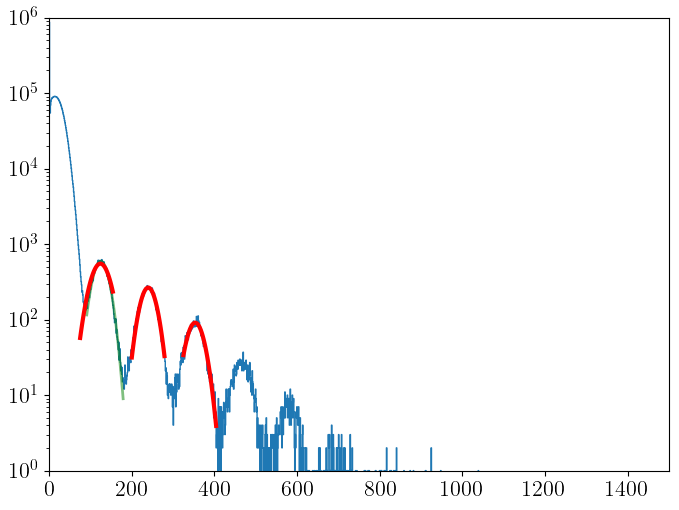

[114.70631706069483]


In [7]:
gain_temp=[]
gain_list_0V=[]
df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_-110C_0\IN2-POS_30V.csv",skiprows=1)

hx=np.array(df['Channel'])
h=np.array(df['Counts'])
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>90) & (hx<180))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,1500)
plt.yscale('log')


for i in range (1,4):
    new_cut=np.where((hx[:-1]>popt[1]*i-(50)) & (hx[:-1]<popt[1]*i+(30)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    # print(popt_new)
    gain_temp.append(popt_new[1])
plt.show()
# print(np.mean((np.diff(gain_temp))))
gain_list_0V.append(np.mean((np.diff(gain_temp))))
print(gain_list_0V)

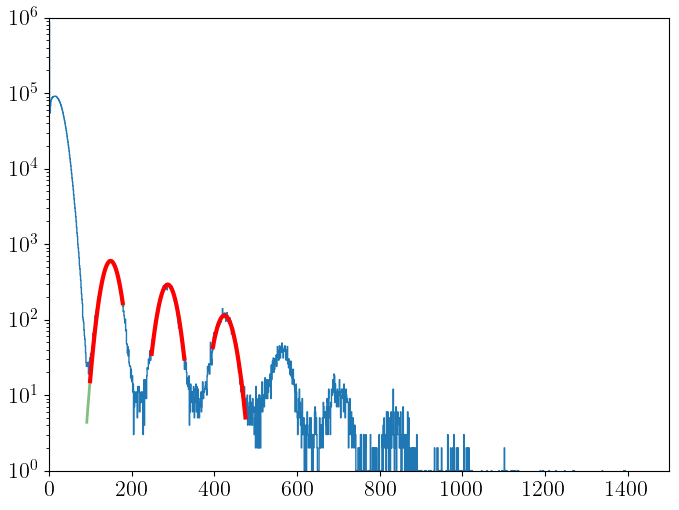

[114.70631706069483, 137.82897198387562]


In [8]:
gain_temp=[]
df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_-110C_0\IN2-POS_30.5V.csv",skiprows=1)

hx=np.array(df['Channel'])
h=np.array(df['Counts'])
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>90) & (hx<180))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,1500)
plt.yscale('log')


for i in range (1,4):
    new_cut=np.where((hx[:-1]>popt[1]*i-(50)) & (hx[:-1]<popt[1]*i+(30)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    # print(popt_new)
    gain_temp.append(popt_new[1])
plt.show()
# print(np.mean((np.diff(gain_temp))))
gain_list_0V.append(np.mean((np.diff(gain_temp))))
print(gain_list_0V)

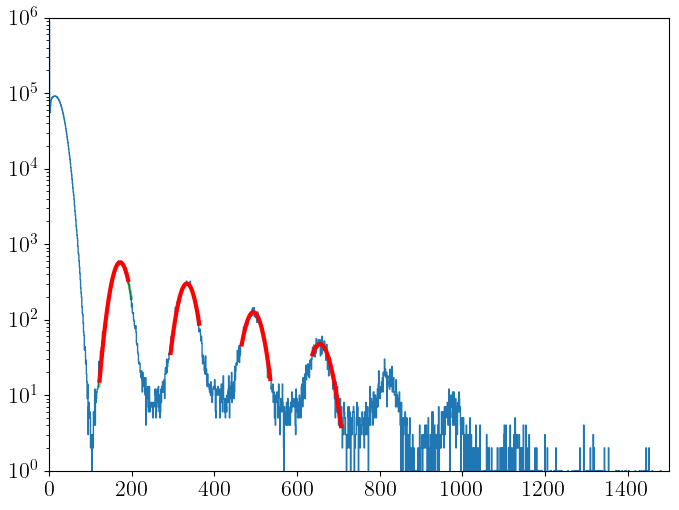

[114.70631706069483, 137.82897198387562, 161.08177622841978]


In [9]:

gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_-110C_0\IN2-POS_31V.csv",skiprows=1)

hx=np.array(df['Channel'])
h=np.array(df['Counts'])
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>120) & (hx<200))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=100)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,1500)
plt.yscale('log')


for i in range (1,5):
    new_cut=np.where((hx[:-1]>popt[1]*i-50) & (hx[:-1]<popt[1]*i+(20)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15])
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    # print(popt_new)
    gain_temp.append(popt_new[1])
plt.show()
# print(np.mean((np.diff(gain_temp))))
gain_list_0V.append(np.mean((np.diff(gain_temp))))
print(gain_list_0V)

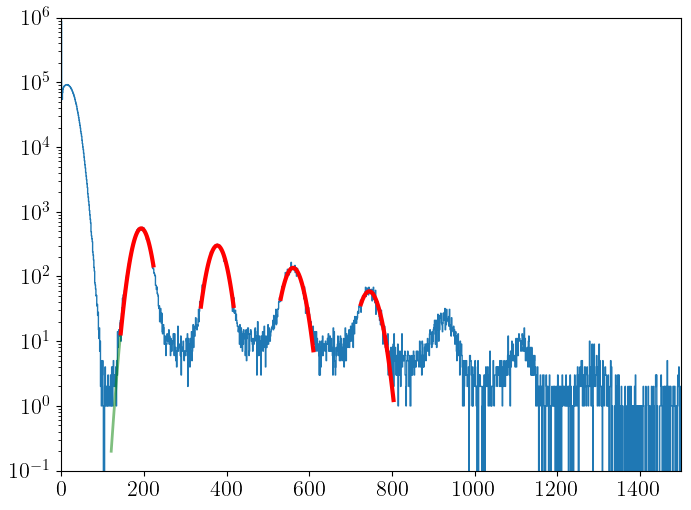

[114.70631706069483, 137.82897198387562, 161.08177622841978, 183.89074703248082]


In [10]:
gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_-110C_0\IN2-POS_31.5V.csv",skiprows=1)

hx=np.array(df['Channel'])
h=np.array(df['Counts'])
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>120) & (hx<210))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=100)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,1500)
plt.yscale('log')


for i in range (1,5):
    new_cut=np.where((hx[:-1]>popt[1]*i-50) & (hx[:-1]<popt[1]*i+(30)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15])
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    # print(popt_new)
    gain_temp.append(popt_new[1])
plt.show()
# print(np.mean((np.diff(gain_temp))))
gain_list_0V.append(np.mean((np.diff(gain_temp))))
print(gain_list_0V)

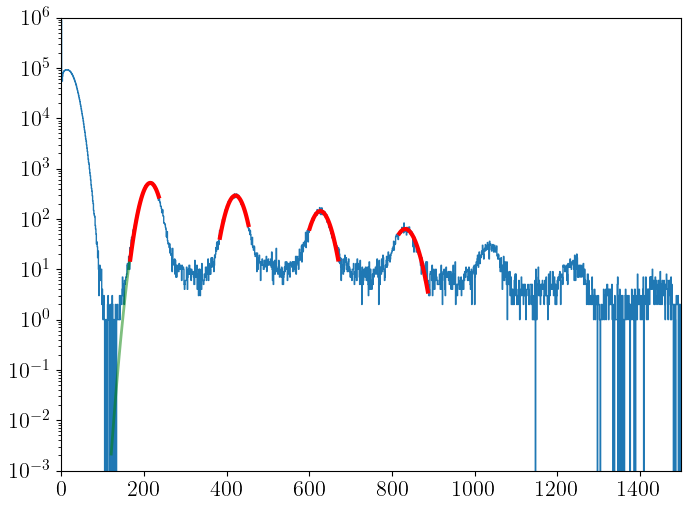

[114.70631706069483, 137.82897198387562, 161.08177622841978, 183.89074703248082, 205.65294340794472]


In [11]:
gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_-110C_0\IN2-POS_32V.csv",skiprows=1)

hx=np.array(df['Channel'])
h=np.array(df['Counts'])
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>120) & (hx<220))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=100)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,1500)
plt.yscale('log')


for i in range (1,5):
    new_cut=np.where((hx[:-1]>popt[1]*i-50) & (hx[:-1]<popt[1]*i+(20)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15])
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    # print(popt_new)
    gain_temp.append(popt_new[1])
plt.show()
# print(np.mean((np.diff(gain_temp))))
gain_list_0V.append(np.mean((np.diff(gain_temp))))
print(gain_list_0V)


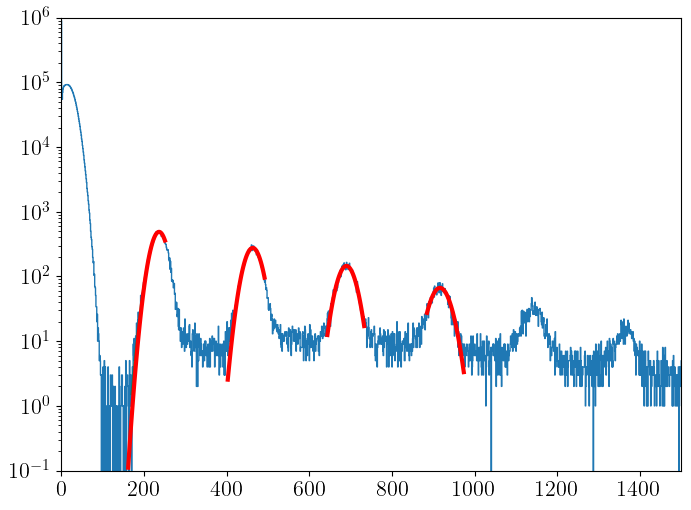

[114.70631706069483, 137.82897198387562, 161.08177622841978, 183.89074703248082, 205.65294340794472, 226.56670608814454]


In [12]:
gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_-110C_0\IN2-POS_32.5V.csv",skiprows=1)

hx=np.array(df['Channel'])
h=np.array(df['Counts'])
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>170) & (hx<230))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,1500)
plt.yscale('log')


for i in range (1,5):
    new_cut=np.where((hx[:-1]>popt[1]*i-80) & (hx[:-1]<popt[1]*i+(10)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    # print(popt_new)
    gain_temp.append(popt_new[1])
plt.show()
# print(np.mean((np.diff(gain_temp))))
gain_list_0V.append(np.mean((np.diff(gain_temp))))
print(gain_list_0V)


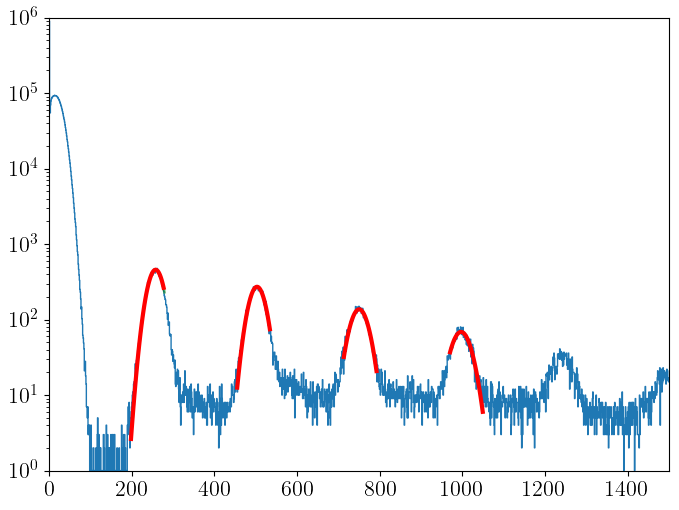

[114.70631706069483, 137.82897198387562, 161.08177622841978, 183.89074703248082, 205.65294340794472, 226.56670608814454, 246.31311404806638]


In [13]:
gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_-110C_0\IN2-POS_33V.csv",skiprows=1)

hx=np.array(df['Channel'])
h=np.array(df['Counts'])
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>200) & (hx<280))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,1500)
plt.yscale('log')


for i in range (1,5):
    new_cut=np.where((hx[:-1]>popt[1]*i-60) & (hx[:-1]<popt[1]*i+(20)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    # print(popt_new)
    gain_temp.append(popt_new[1])
plt.show()
# print(np.mean((np.diff(gain_temp))))
gain_list_0V.append(np.mean((np.diff(gain_temp))))
print(gain_list_0V)

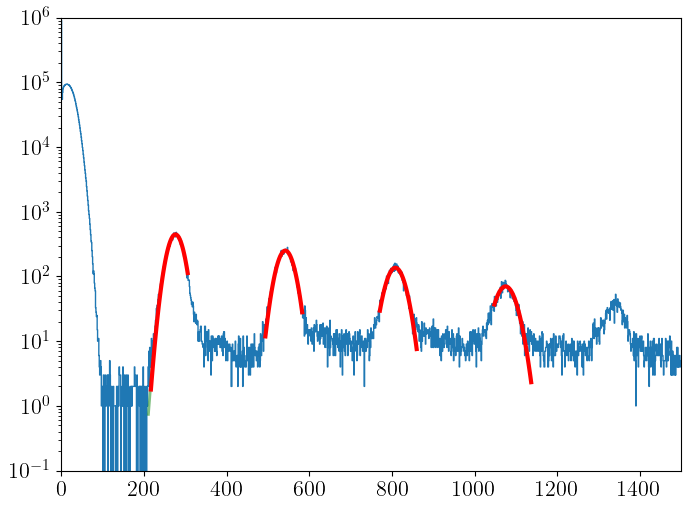

[114.70631706069483, 137.82897198387562, 161.08177622841978, 183.89074703248082, 205.65294340794472, 226.56670608814454, 246.31311404806638, 266.20013954923485]


In [14]:
gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_-110C_0\IN2-POS_33.5V.csv",skiprows=1)

hx=np.array(df['Channel'])
h=np.array(df['Counts'])
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>210) & (hx<290))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,1500)
plt.yscale('log')


for i in range (1,5):
    new_cut=np.where((hx[:-1]>popt[1]*i-60) & (hx[:-1]<popt[1]*i+(30)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    # print(popt_new)
    gain_temp.append(popt_new[1])
plt.show()
# print(np.mean((np.diff(gain_temp))))
gain_list_0V.append(np.mean((np.diff(gain_temp))))
print(gain_list_0V)

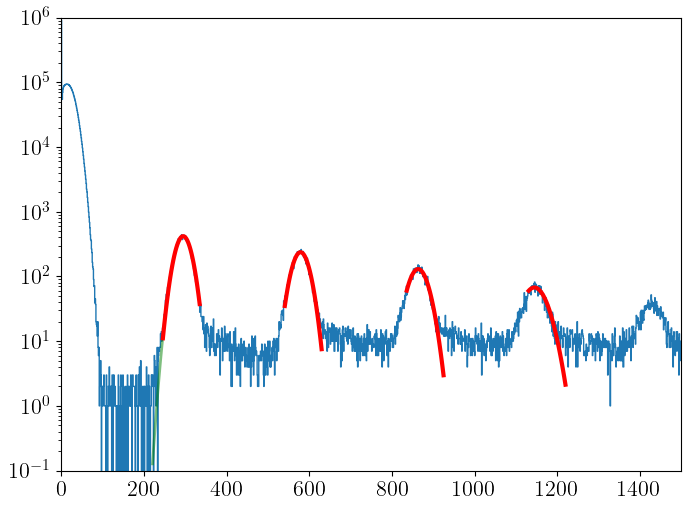

[114.70631706069483, 137.82897198387562, 161.08177622841978, 183.89074703248082, 205.65294340794472, 226.56670608814454, 246.31311404806638, 266.20013954923485, 283.24963917530454]


In [15]:
gain_temp=[]

df=pd.read_csv(r"C:\Users\nEXO\Downloads\Gain_-110C_0\IN2-POS_34V.csv",skiprows=1)

hx=np.array(df['Channel'])
h=np.array(df['Counts'])
plt.step(hx,h,lw=1)
cut=cut=np.where((hx>220) & (hx<300))
popt,pcov=curve_fit(gauss,hx[cut],h[cut],p0=[np.max(h[cut]),120,15],maxfev=10000)
plt.plot(hx[cut],gauss(hx[cut],*popt),color='green',label='Fit',lw=2,alpha=0.5)
plt.xlim(0,1500)
plt.yscale('log')


for i in range (1,5):
    new_cut=np.where((hx[:-1]>popt[1]*i-50) & (hx[:-1]<popt[1]*i+(40)))
    popt_new,pcov_new=curve_fit(gauss,hx[new_cut],h[new_cut],p0=[np.max(h[new_cut]),popt[1]*i,15],maxfev=100000)
    plt.plot(hx[new_cut],gauss(hx[new_cut],*popt_new),color='r',label='Fit',lw=3)
    # print(popt_new)
    gain_temp.append(popt_new[1])
plt.show()
# print(np.mean((np.diff(gain_temp))))
gain_list_0V.append(np.mean((np.diff(gain_temp))))
print(gain_list_0V)

27.217819668538


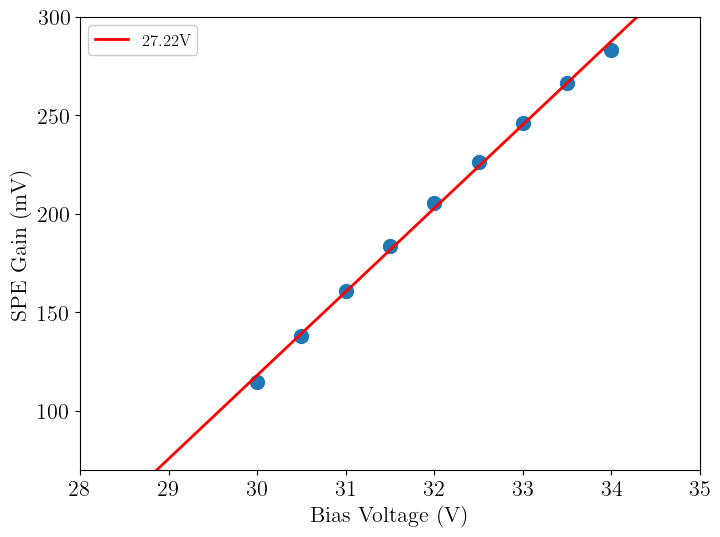

In [24]:
def line(x,m,c):
    return m*x+c
x_data=np.arange(0,100,1)
BV_list=[30,30.5,31,31.5,32,32.5,33,33.5,34]
BV_list=np.array(BV_list)
gain_list_0V=np.array(gain_list_0V)
plt.scatter(BV_list,gain_list_0V)
popt_line,pcov_line=curve_fit(line,BV_list,gain_list_0V,p0=[31,27])
print(-popt_line[1]/popt_line[0])
plt.plot(x_data,line(x_data,*popt_line),color='r',label=str(np.round(-popt_line[1]/popt_line[0],2))+'V')
plt.ylabel('SPE Gain (mV)')
plt.xlabel('Bias Voltage (V)')
plt.xlim(28,35)
plt.ylim(70,300)
plt.legend(loc=2)
plt.show()